In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import model_report as mr
import pickle
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_test = pd.read_csv('C:\\Users\\blgai\\OneDrive\\Documents\\School\\SMU\\Courses\\Fall 2021\\Capstone A\Data\\test_comp_nouns_v1.csv')

In [3]:
#load data... this data is the optimal 4100 features we identified
X_train = pickle.load(open('tv_train_features_sub.pkl','rb'))
X_test = pickle.load(open('tv_test_features_sub.pkl','rb'))
#X_holdout = pickle.load(open('tv_holdout_features_sub.pkl','rb'))

#load labels
y_train = pickle.load(open('train_label.pkl','rb'))
y_test = pickle.load(open('test_label.pkl','rb'))
#y_holdout = pickle.load(open('holdout_label.pkl','rb'))

#save TFIDFVectorizer to disk
#pickle.dump(tv,open('TFIDFVectorizer.pkl','wb'))

In [4]:
clf = svm.SVC(kernel='linear', probability=True, C=1.0,random_state=1234)
ovr = OneVsRestClassifier(clf)
ovr.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=1234))

In [5]:
ovr_test_score = ovr.score(X_test,y_test)
print('Test Accuracy:',ovr_test_score)

Test Accuracy: 0.8677557834486048


In [6]:
import model_evaluation_utils as meu
ovr_predictions = ovr.predict(X_test)
meu.get_metrics(true_labels=y_test,predicted_labels=ovr_predictions)

Accuracy: 0.8678
Precision: 0.8682
Recall: 0.8678
F1 Score: 0.8678


In [7]:
unique_classes = list(set(y_test))
meu.display_classification_report(true_labels=y_test,predicted_labels=ovr_predictions,classes=unique_classes)

              precision    recall  f1-score   support

          ed       0.91      0.89      0.90       783
          bu       0.85      0.88      0.86      2355
          dr       0.98      0.94      0.96       307
          sx       0.99      0.99      0.99      1345
          mk       0.77      0.78      0.77      1709
          os       0.85      0.80      0.82      1393
          sp       0.89      0.90      0.90       494

    accuracy                           0.87      8386
   macro avg       0.89      0.88      0.89      8386
weighted avg       0.87      0.87      0.87      8386



Confusion matrix, without normalization
[[1120   19    3   14  144    3   90]
 [   8  694    0   10   17    0   54]
 [   9    1  288    0    3    2    4]
 [  11    6    0  445   25    3    4]
 [ 109   24    0   24 1327    3  222]
 [   3    0    0    1    4 1334    3]
 [  65   17    2    5  196    1 2069]]


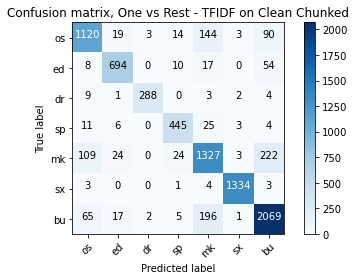

In [8]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,ovr_predictions,labels=['os','ed','dr','sp','mk','sx','bu'])
mr.plot_confusion_matrix(cnf_matrix, classes=['os','ed','dr','sp','mk','sx','bu'],
                      title='Confusion matrix, One vs Rest - TFIDF on Clean Chunked')

In [9]:
df_test_results = pd.DataFrame(list(zip(df_test['clean_comp_nouns'],y_test,ovr_predictions)),columns = ['terms','category','predicted_label'])
df_test_results['match'] = np.where(df_test_results['category']==df_test_results['predicted_label'],1,0)

In [10]:
rpt = mr.generate_report(df_test_results)
rpt

{'totalSamples': 8386,
 'overallAccuracy': 0.8677557834486048,
 'byCategory': {'sx': {'totalSamples': 1345, 'accuracy': 0.9918215613382899},
  'dr': {'totalSamples': 307, 'accuracy': 0.9381107491856677},
  'sp': {'totalSamples': 494, 'accuracy': 0.9008097165991903},
  'ed': {'totalSamples': 783, 'accuracy': 0.8863346104725415},
  'bu': {'totalSamples': 2355, 'accuracy': 0.8785562632696391},
  'os': {'totalSamples': 1393, 'accuracy': 0.8040201005025126},
  'mk': {'totalSamples': 1709, 'accuracy': 0.7764774722059684}}}

In [11]:
#save model file
filename = 'ovr_comp_nouns_v1.sav'
pickle.dump(ovr,open(filename,'wb'))